# Stock price prediction using LSTM model

Data collection

In [107]:
import pandas_datareader as pdr

In [108]:
# df_d_d_d_d = pdr.get_data_alphavantage('AAPL', api_key="6LOQ1D5W8YFL9IX5", start='2015-01-01', end='2023-12-31')
# df.to_csv('AAPL.csv')

[*********************100%%**********************]  1 of 1 completed


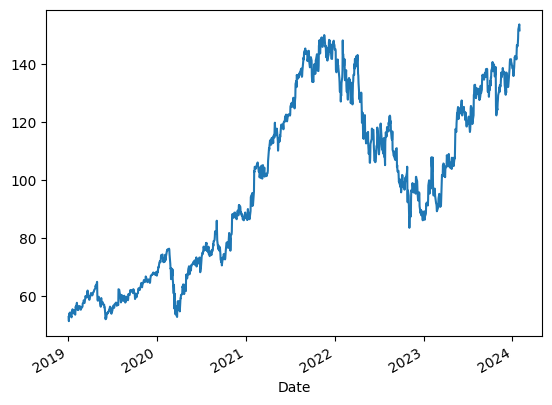

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000
...,...,...,...,...,...,...
2024-01-24,148.539993,149.850006,148.100006,148.699997,148.699997,25233500
2024-01-25,150.070007,153.050003,149.539993,151.869995,151.869995,29149100
2024-01-26,151.100006,152.539993,151.009995,152.190002,152.190002,26115500


In [109]:
# plot graph of stock price using yahoo finance
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

df = pdr.data.get_data_yahoo('GOOGL', start='2019-01-01', end='2024-01-31')
df.to_csv('MSFT.csv')
df['Close'].plot()

plt.show()
df

In [110]:
# msft = yf.Ticker("MSFT")
# print(msft.news)
# # msft.earnings_dates



In [112]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
1,2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2,2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
3,2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
4,2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


In [113]:
df.shape

(1278, 7)

Data preprocessing

In [114]:
df=df.reset_index()['Close']
df.head()

0    52.734001
1    51.273499
2    53.903500
3    53.796001
4    54.268501
Name: Close, dtype: float64

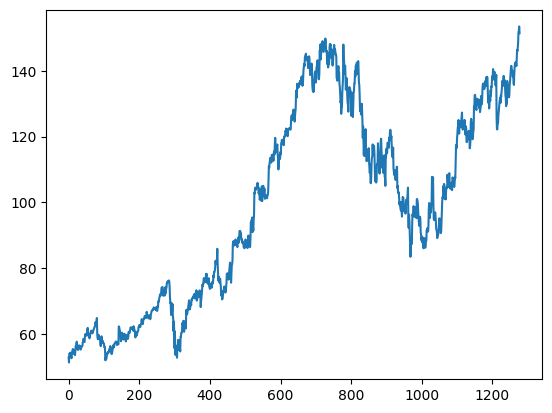

In [115]:
import matplotlib.pyplot as plt 
plt.plot(df)

In [116]:
import numpy as np

Data normalisation

In [117]:
# # Data Normalization through standard scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [119]:
df

array([[0.01428553],
       [0.        ],
       [0.02572468],
       ...,
       [0.98708884],
       [1.        ],
       [0.97994857]])

Testing & Training

In [120]:
train_len = int(len(df)*0.7)
test_len = len(df) - train_len
train_data, test_data = df[0:train_len,:], df[train_len:len(df),:1]

In [121]:
train_len, test_len

(894, 384)

In [122]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1): 
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [123]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [124]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(793, 100) (793,)
(283, 100) (283,)


Data Reshaping

In [125]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

LSTM Model Generation

In [126]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [127]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50)) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\goush\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [128]:
'''
model = Sequential()
model.add(LSTM(50, activation='relu' , return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
'''

"\nmodel = Sequential()\nmodel.add(LSTM(50, activation='relu' , return_sequences=True, input_shape=(time_step, 1)))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(50, activation='relu', return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(50, activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n"

In [129]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=1)

Epoch 1/50


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.1915 - val_loss: 0.0457
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0369 - val_loss: 0.0466
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0210 - val_loss: 0.0107
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0046 - val_loss: 0.0130
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0027 - val_loss: 0.0043
Ep

In [131]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [132]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [133]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

101.32637169634124

In [134]:
math.sqrt(mean_squared_error(y_test, test_predict))

120.03156889121787

In [135]:
import numpy as np

y_denormalized = scaler.inverse_transform(y_test.reshape(-1,1)) 
n = len(y_denormalized)

# Calculate MAPE : Mean absolute percentage error
mape = np.mean(np.abs(100 * np.abs((y_denormalized - test_predict) / y_denormalized))) 

# Calculate sMAPE : symmetric Mean absolute percentage error
smape = np.mean(200 * np.abs(y_denormalized - test_predict) / (y_denormalized + test_predict)) 

print("MAPE: ", mape)
print("sMAPE: ", smape)


MAPE:  3.578773106988386
sMAPE:  3.5471772548857126


Plotting

In [136]:
# look_back = 100
# trainPredictPlot = np.empty_like(df)
# trainPredictPlot[:,:] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# testPredictPlot = np.empty_like(df)
# testPredictPlot[:,:] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plt.figure(figsize=(10,5))
# plt.title('Stock Price Prediction')
# plt.xlabel('No. of stocks')
# plt.ylabel('Stock Price')

# plt.plot(scaler.inverse_transform(df))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [137]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

df_d = pd.read_csv('AAPL.csv')
df_d= df_d[['Date', 'Close']]
df_d['Date'] = pd.to_datetime(df_d['Date'])
df_d= df_d.set_index('Date')
df_d= df_d.loc['2015-01-01':'2024-01-31']
df_d= df_d.reset_index()

plt.figure(figsize=(10,5))
plt.title('Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Stock Price')

plt.plot(df_d['Date'], df_d['Close'])
plt.plot(df_d['Date'], trainPredictPlot)
plt.plot(df_d['Date'], testPredictPlot)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'AAPL.csv'

In [ ]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1



[0.9137552]
101
1 day input [0.88645488 0.89317761 0.87574421 0.8638371  0.8725538  0.86839478
 0.88525851 0.89152546 0.8711295  0.8622418  0.86714139 0.87449082
 0.85101841 0.84230162 0.84378295 0.84674551 0.86121635 0.8535251
 0.86070362 0.86782511 0.88252389 0.89106968 0.88765133 0.89568439
 0.90086886 0.89027207 0.88953141 0.88058677 0.87312346 0.87095859
 0.85625982 0.85694345 0.85945023 0.84611882 0.82213359 0.82971087
 0.84150402 0.84423873 0.86246974 0.88297967 0.87773818 0.89243695
 0.90719275 0.9132887  0.91055407 0.93328582 0.92417036 0.93921095
 0.9424583  0.9521436  0.95202964 0.96205667 0.95744195 0.96125906
 0.95362484 0.9525993  0.9560746  0.95020649 0.95351088 0.9608603
 0.95054831 0.97328015 0.96701328 0.9781228  0.98632677 0.97191279
 0.98062957 0.99914546 1.         0.99692355 0.98735222 0.99333429
 0.98131321 0.98045858 0.97430569 0.97117221 0.97174188 0.97419172
 0.96820965 0.92895598 0.92103689 0.90770547 0.90354646 0.9285002
 0.92610739 0.93208946 0.92867111 0.9

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

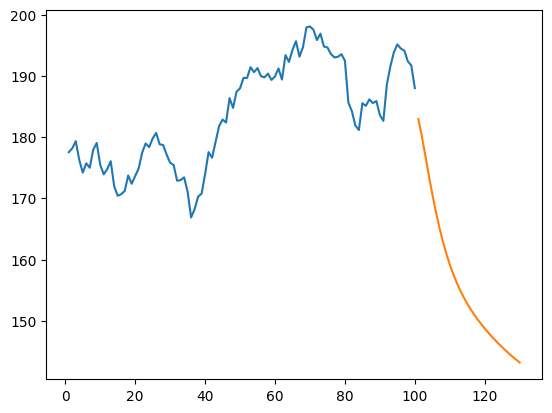

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df[len(df)-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

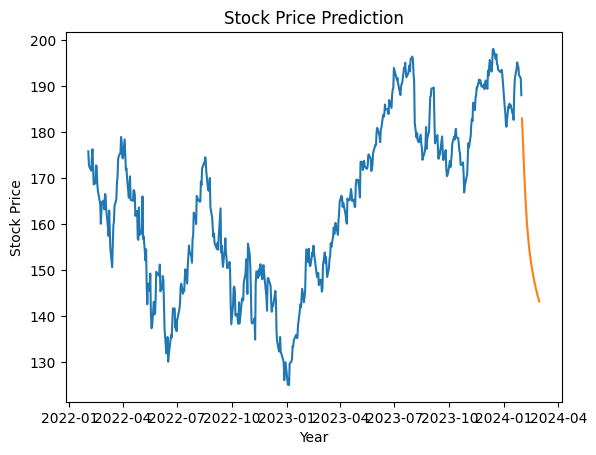

In [ ]:
# plt.figure(figsize=(10,5))
plt.title('Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Stock Price')

plt.plot(df_d['Date'][-500:], df_d['Close'][-500:])


# Get the last date in the existing dataframe
last_date = df_d['Date'].max()

# Generate dates for the next 30 days
future_dates = pd.date_range(start=last_date, periods=31)[1:]  # we start at the day after the last date

# Create a new dataframe with these dates
df_future = pd.DataFrame(future_dates, columns=['Date'])

plt.plot(future_dates, scaler.inverse_transform(lst_output))


plt.show()

